Emotion detection

importing Libraries

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.17.0


Exploring dataset

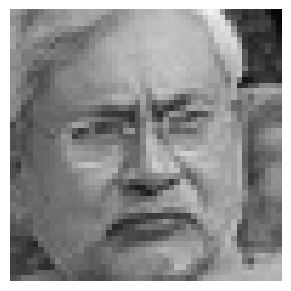

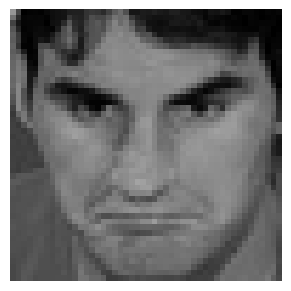

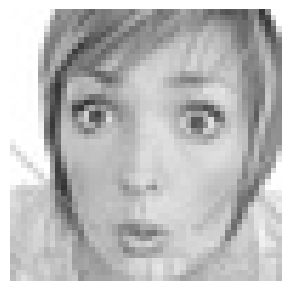

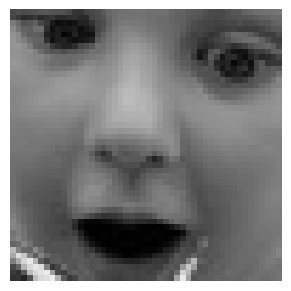

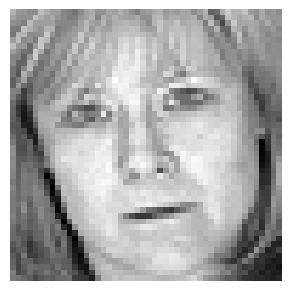

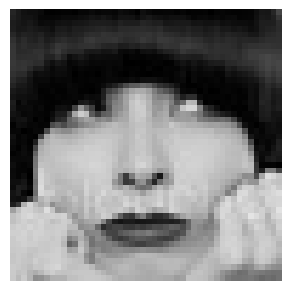

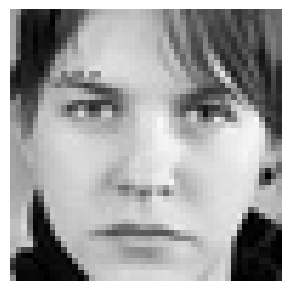

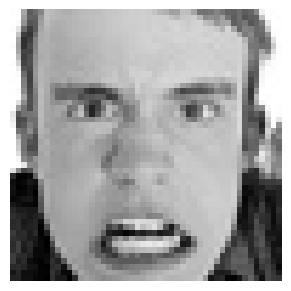

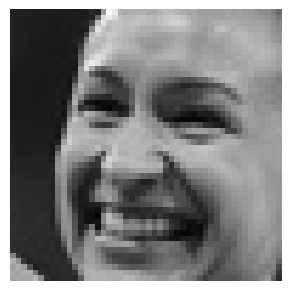

In [2]:
# Define the directory path
directory_path = r"E:\Nullclass Projrct\Build a Real Time Application for Emotional Detector\Dataset\train"

# Use glob to find images in the directory and subdirectories
images = glob(f"{directory_path}\\**\\*.jpg", recursive=True)  # Adjust the extension as needed

for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

Preparing data for training 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 48
batch_size = 64

# Initialize ImageDataGenerator for training and test datasets
datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()

# Training data generator
train_generator = datagen_train.flow_from_directory(
    r"E:\Nullclass Projrct\Build a Real Time Application for Emotional Detector\Dataset\train",  # Train directory
    target_size=(image_size, image_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Test data generator
test_generator = datagen_test.flow_from_directory(
    r"E:\Nullclass Projrct\Build a Real Time Application for Emotional Detector\Dataset\test",  # Test directory
    target_size=(image_size, image_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True  # Shuffle is usually False for test data
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Defining model

In [4]:
def Convalution(input_tensor,filter,kernel_size):
    x= Conv2D(filters, kernel_size, padding= "same")(input_tensor)
    x=BatchNormalization()(x)
    x= Activation('relu')(x)
    x= MaxPooling2D(pool_size= (2,2))(x)
    x = Dropout(0.25)(x)

    return x

In [5]:
def Dense_f(input_tensor,nodes):
    x= Dense(nodes)(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= Dropout(0.25)(x)
    return x

In [6]:
def Convalution(input_tensor, filter, kernel_size):
    x = Conv2D(filter, kernel_size, padding="same")(input_tensor)  # Changed filters to filter
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x


In [7]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Flatten, Dense

def Convalution(input_tensor, filter, kernel_size):
    x = Conv2D(filter, kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convalution(inputs, 32, (3, 3))
    conv_2 = Convalution(conv_1, 64, (5, 5))
    conv_3 = Convalution(conv_2, 128, (3, 3))
    
    # Flatten and fully connected layers
    flatten = Flatten()(conv_3)
    dense_1 = Dense(128, activation='relu')(flatten)
    outputs = Dense(7, activation='softmax')(dense_1)  # Assuming 7 classes for emotion detection
    
    model = Model(inputs=inputs, outputs=outputs)  # Create the model
    return model

# Create the model
model = model_fer((48, 48, 1))

# Now you can call summary on the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 294912)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    37,748,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,876,103 (144.49 MB)

 Trainable params: 37,875,655 (144.48 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16530884865373733654
xla_global_id: -1
]


initializing the model

In [10]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps= test_generator.n//test_generator.batch_size
checkpoint = ModelCheckpoint("model_weights.weights.h5",  # Updated the file extension
                             monitor="val_accuracy", 
                             save_weights_only=True, 
                             mode="max", 
                             verbose=1)

callbacks= [checkpoint]

Train the model

The next cell takes time to complate


In [ ]:
# Compile the model before training
model.compile(
    optimizer='adam',             # Choose an optimizer, e.g., 'adam'
    loss='categorical_crossentropy',  # Define the loss function, e.g., 'categorical_crossentropy' for classification
    metrics=['accuracy']          # Define performance metrics to track, e.g., 'accuracy'
)

# Now you can fit the model
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)



c:\Anacondaa\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
141/448 ━━━━━━━━━━━━━━━━━━━━ 10:27 2s/step - accuracy: 0.1786 - loss: 40.5747

In [19]:
model.evaluate(test_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 37s 327ms/step - accuracy: 0.4204 - loss: 1.9594


[1.9591834545135498, 0.4204513728618622]

plotting loss

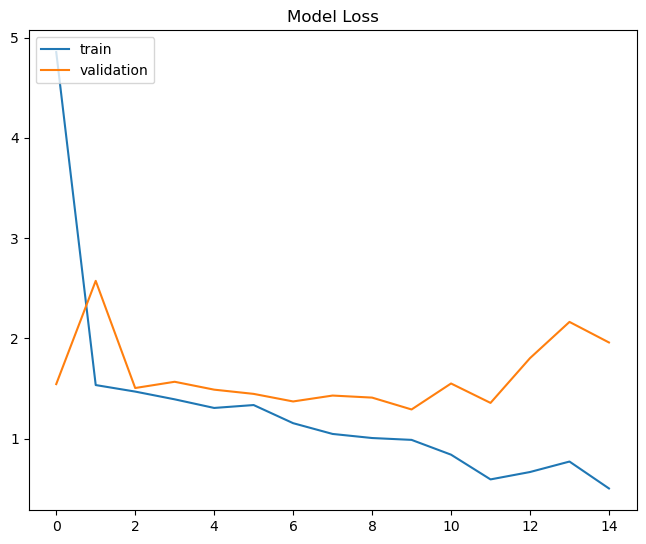

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['train', 'validation'], loc='upper left')

# Adjust the subplots layout
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()



modelaccuracy

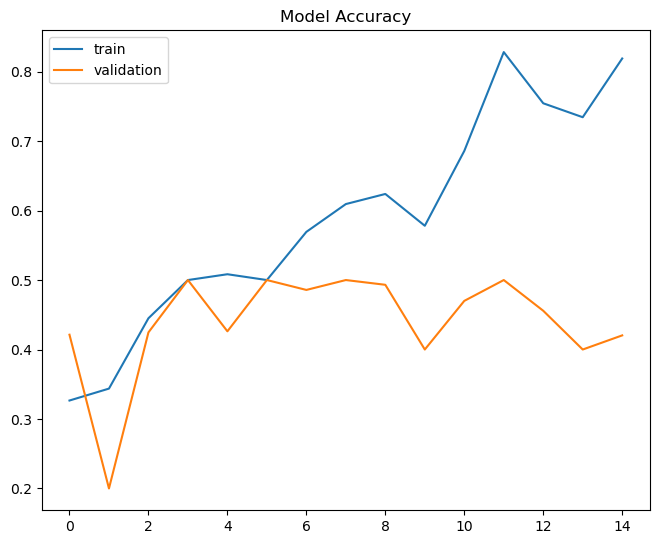

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['train', 'validation'], loc='upper left')

# Adjust the subplots layout
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
plt.show()


savingmodel

In [22]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)

print("Model architecture saved to model_a.json")


Model architecture saved to model_a.json
